<a href="https://colab.research.google.com/github/DhamuSniper/Kaggle-Competitions-Beginners/blob/master/titanic_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [217]:
from google.colab import files
train_upload=files.upload()

Saving train.csv to train (1).csv


In [0]:
import io
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tempfile
%matplotlib inline

In [0]:
titanic_data=pd.read_csv(io.BytesIO(train_upload['train.csv']))

In [221]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [222]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [0]:
# cols_to_norm=['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
#        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
    

In [0]:
# titanic_data[cols_to_norm]=titanic_data[cols_to_norm].apply(lambda x:(x-x.min())/(x.max()-x.min()))

In [0]:


Class=tf.feature_column.numeric_column('Pclass')
age=tf.feature_column.numeric_column('Age')

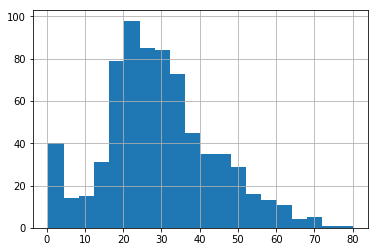

In [225]:
titanic_data['Age'].hist(bins=20)

In [0]:
grouped_gender=tf.feature_column.categorical_column_with_vocabulary_list('Sex',['male','female'])

In [0]:
gen_category=tf.feature_column.indicator_column(grouped_gender)

In [0]:
feat_cols=[Class,gen_category,age]

In [0]:
x_data=titanic_data.drop(['Survived','Cabin','Name','Ticket','Embarked','SibSp','Parch','Fare','PassengerId'],axis=1)


In [230]:
  x_data.head()

,Pclass,Sex,Age
0,3,male,22.0
1,1,female,38.0
2,3,female,26.0
3,1,female,35.0
4,3,male,35.0


In [0]:
labels=titanic_data['Survived']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test=train_test_split(x_data,labels,test_size=0.2,random_state=101)

In [235]:
x_data.head()

,Pclass,Sex,Age
0,3,male,22.0
1,1,female,38.0
2,3,female,26.0
3,1,female,35.0
4,3,male,35.0


In [236]:
X_train.shape

(712, 3)

In [237]:
y_train.shape

(712,)

In [238]:
X_test.shape

(179, 3)

In [239]:
y_test.shape

(179,)

In [0]:

input_func=tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=6,num_epochs=100,shuffle=False)

In [256]:
model=tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

W0708 05:39:20.144152 140663907391360 estimator.py:1811] Using temporary folder as model directory: /tmp/tmppx4_ico6


In [258]:
model.train(input_fn=input_func,steps=1000)


E0708 07:00:09.006055 140663907391360 basic_session_run_hooks.py:760] Model diverged with loss = NaN.


NanLossDuringTrainingError: ignored

In [244]:
print (tempfile.gettempdir())


/tmp
